In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas
import glob
import os
from PIL import Image

In [22]:
def read_ann(filename):
    with open(filename, 'r') as f:
        lines = f.read().splitlines()
    return lines

In [41]:
root_path = 'data/jester/SC_jester_5cls_12_samples_seed_5'
anns = read_ann(f'{root_path}/train_list_rawframes.txt')
folders = [i.split(' ')[0] for i in anns]
folders = folders[::6]

In [42]:
label_map = read_ann(f'{root_path}/label_map.txt')
label_map

['Stop Sign',
 'Turning Hand Counterclockwise',
 'No gesture',
 'Swiping Up',
 'Thumb Up']

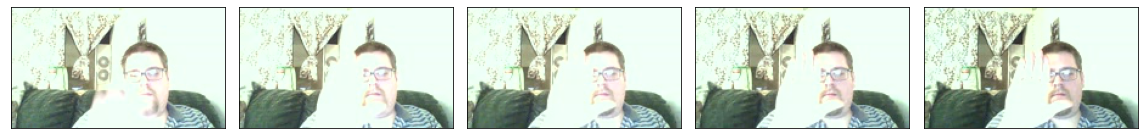

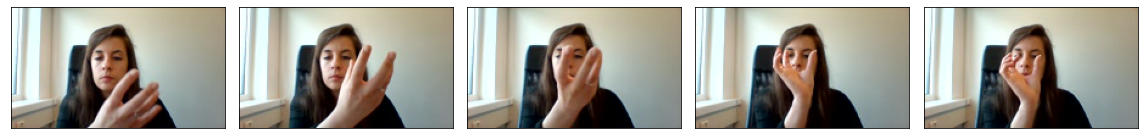

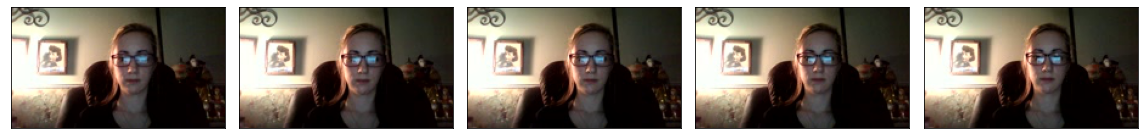

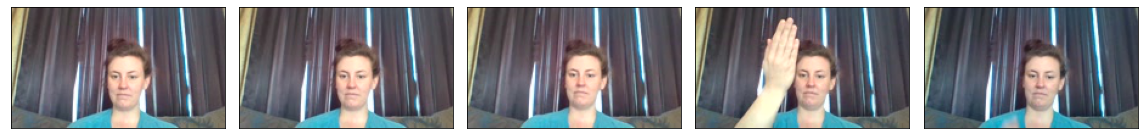

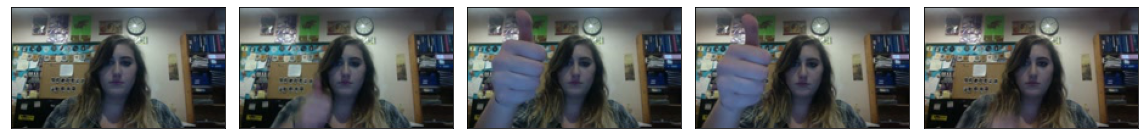

In [44]:
for folder_idx, folder in enumerate(folders):
    imgs = sorted(glob.glob(os.path.join(root_path, 'rawframes_train', folder)+'/*.jpg'))
    num_imgs = 5
    interval = len(imgs) // num_imgs

    plt.figure(figsize=(16, 8))
    plt.title(label_map[folder_idx])
    for i in range(num_imgs):
        plt.subplot(1, num_imgs, i+1)
        img_arr = np.array(Image.open(imgs[i*interval]))
        plt.imshow(img_arr)
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()
    plt.savefig(folder.split('/')[0]+'_jester.jpg', dpi=300)
    plt.show()